In [2]:
#Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
#Data Preparation And Visualization
data = pd.read_csv("nse_indexes.csv")
data.head()


,Date,Index,Open,High,Low,Close,Volume,Currency
0,1995-11-06,NIFTY 50,1001.53,1001.53,988.92,988.92,0,INR
1,1995-11-07,NIFTY 50,987.17,987.17,977.05,978.22,0,INR
2,1995-11-08,NIFTY 50,976.28,976.28,962.98,964.01,0,INR
3,1995-11-09,NIFTY 50,960.32,960.32,952.13,953.07,0,INR
4,1995-11-10,NIFTY 50,951.93,951.93,946.00,948.82,0,INR


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87536 entries, 0 to 87535
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      87536 non-null  object 
 1   Index     87536 non-null  object 
 2   Open      87536 non-null  float64
 3   High      87536 non-null  float64
 4   Low       87536 non-null  float64
 5   Close     87536 non-null  float64
 6   Volume    87536 non-null  int64  
 7   Currency  87536 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 5.3+ MB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,87536.000000,87536.000000,87536.000000,87536.000000,8.753600e+04
mean,6887.871426,6933.635670,6830.964597,6881.640576,1.935475e+10
std,7143.736966,7186.844841,7084.755363,7135.458672,1.024960e+11
min,10.447500,10.807500,8.740000,10.447500,0.000000e+00
25%,2183.662500,2199.765000,2166.245000,2182.212500,0.000000e+00
50%,4240.325000,4274.825000,4196.725000,4237.250000,8.948500e+06
75%,9417.187500,9478.575000,9344.212500,9408.612500,1.068200e+08
max,45216.550000,45290.800000,44657.000000,44708.100000,1.971784e+12


In [6]:
#Splitting Data In X and Y
X = data[['High','Low','Open','Volume']].values
y = data['Close'].values
print(X)

[[1001.53  988.92 1001.53    0.  ]
 [ 987.17  977.05  987.17    0.  ]
 [ 976.28  962.98  976.28    0.  ]
 ...
 [2344.42 2334.43 2344.42    0.  ]
 [2335.28 2332.73 2334.18    0.  ]
 [2337.8  2335.99 2335.99    0.  ]]


In [7]:
print(y)

[ 988.92  978.22  964.01 ... 2334.5  2333.3  2337.64]


In [8]:
#Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [9]:
#Training the Model


#from sklearn.linear_model import LinearRegression
# Create Regression Model 
Model = LinearRegression()

# Train the model
Model.fit(X_train, y_train)
#Printing Coefficient
print(Model.coef_)

# Use model to make predictions
predicted = Model.predict(X_test) 
print(predicted)

[ 8.66428662e-01  7.68060961e-01 -6.34583038e-01  5.16593206e-12]
[ 6210.74478151  1794.63305809  2682.578382   ...  1787.46723752
 12078.92144839  2381.3829392 ]


In [10]:
#Combining The Actual and Predicted data to match
data1 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data1.head(20)

,Actual,Predicted
0,6194.25,6210.744782
1,1796.59,1794.633058
2,2717.00,2682.578382
3,2977.85,2997.195909
4,8318.10,8298.651191
5,1590.55,1590.538312
6,3534.20,3542.078506
7,2693.70,2707.422483
8,5799.30,5762.883543
9,10340.10,10306.233890


In [11]:
#Validating the Fit
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Mean Absolute Error: 20.574366012758272
Mean Squared Error: 1765.4920615622084
Root Mean Squared Error: 42.017758883146165


<AxesSubplot:>

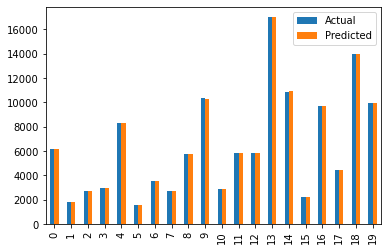

In [12]:
#Consider the following chart of our observed values versus expected values to see how this is portrayed visually:
graph = data1.head(20)
graph.plot(kind='bar')